# OFFENSES NEW YORK 

[dataset NY](https://www.kaggle.com/adamschroeder/crimes-new-york-city?select=Crime_Column_Description.csv)

In [ ]:
# topicos a serem executados
#  agrupamento por ano , ofensas ano a ano

# 
# 
# df.groupby(df['data']).dt.year['vendas'].sum()

# gerando grafico
# df.groupby(df['data'].dt.year)['vendas'].sum().plot.bar()

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# importando os dados referentes aos delitos em nova york
ny  = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

C:\Users\pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
ny

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,317154175,11/1/2013,20:30:00,11/1/2013,21:00:00,11/1/2013,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,40.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1006185.0,233271.0,40.806932,-73.920767,"(40.806931888, -73.920766811)"
1048571,833410354,11/1/2013,20:28:00,11/1/2013,20:31:00,11/1/2013,344,ASSAULT 3 & RELATED OFFENSES,113.0,"MENACING,UNCLASSIFIED",...,75.0,FRONT OF,GROCERY/BODEGA,NaN,NaN,1013319.0,180075.0,40.660901,-73.895227,"(40.660901484, -73.895226891)"
1048572,961949188,11/1/2013,20:25:00,NaN,NaN,11/1/2013,121,CRIMINAL MISCHIEF & RELATED OF,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",...,1.0,INSIDE,FAST FOOD,NaN,NaN,982953.0,203013.0,40.723909,-74.004681,"(40.723908621, -74.004680695)"
1048573,157608118,11/1/2013,20:25:00,11/1/2013,20:45:00,11/1/2013,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,52.0,FRONT OF,STREET,NaN,NaN,1019388.0,259017.0,40.877554,-73.872939,"(40.877554428, -73.872939471)"


# Creating a new DataFrame "select_ny"


##  Eliminando possiveis erros do DataFrame :

### ny['CMPLNT_FR_DT' , 'CMPLNT_FR_TM','CMPLNT_TO_DT','CMPLNT_TO_TM', 'RPT_DT']

#### -  As colunas acima serão convertidas para formato datetime

#### -  Valores que estiverem fora do padrão serão eliminados

In [5]:
# df['Datetime'] = pd.to_datetime(df['Datetime'], format="%m/%d/%Y, %H:%M:%S")
#import pandas as pd
# df = pd.read_csv('DataFrame.csv', delimiter=";");

# df['Data e Hora'] = pd.to_datetime(df['Data e Hora'])
# df['Data'] = df['Data e Hora'].dt.strftime('%Y-%m-%d')
# df['Hora'] = df['Data e Hora'].dt.strftime('%H:%M:%S')
# df["date"] = pd.to_datetime(df["month"], format="%Y-%m")

#### Criando uma copia do DataFrame ny

In [6]:
ny_datetime = ny.copy()

#### Convertendo as colunas para formato datetime

In [7]:
ny_datetime["CMPLNT_FR_DT"] = pd.to_datetime(ny_datetime["CMPLNT_FR_DT"], errors = 'coerce')

In [8]:
ny_datetime['CMPLNT_FR_TM'] = pd.to_datetime(ny_datetime['CMPLNT_FR_TM'])

In [9]:
ny_datetime['CMPLNT_TO_DT'] = pd.to_datetime(ny_datetime['CMPLNT_TO_DT'], errors = 'coerce')

In [10]:
ny_datetime['CMPLNT_TO_TM'] = pd.to_datetime(ny_datetime['CMPLNT_TO_TM'])

In [11]:
ny_datetime['RPT_DT'] = pd.to_datetime(ny_datetime['RPT_DT'], errors = 'coerce')

## Criando uma nova coluna "duracao_da_ocorrencia"

### ny['duracao_da_ocorrencia']

In [12]:
 ny_datetime['duracao_da_ocorrencia'] = ny_datetime['CMPLNT_TO_TM'] - ny_datetime['CMPLNT_FR_TM']

In [13]:
ny_datetime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,duracao_da_ocorrencia
0,101109527,2015-12-31,2020-11-01 23:45:00,NaT,NaT,2015-12-31,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)",NaT
1,153401121,2015-12-31,2020-11-01 23:36:00,NaT,NaT,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)",NaT
2,569369778,2015-12-31,2020-11-01 23:30:00,NaT,NaT,2015-12-31,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)",NaT
3,968417082,2015-12-31,2020-11-01 23:30:00,NaT,NaT,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)",NaT
4,641637920,2015-12-31,2020-11-01 23:25:00,2015-12-31,2020-11-01 23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)",00:05:00


## Selecionando colunas do DataFrame "ny_datetime"

Utilizamos o DataFrame "ny_datetime" , que ja tem as colunas convertidas para o padrão datetime.

Por meio do metodo iloc ,selecinamos as colunas que tem informaçoes uteis, relacionadas aos delitos praticados.

 

In [14]:
select_ny = ny_datetime.iloc[:, [1,2,3,4,5,7,10,11,12,13,15,16,24]]

## Renomeando as colunas do DataFrame select_ny

In [15]:
select_ny.columns = ['data_da_ocorrencia','hora_da_ocorrencia','data_final_da_ocorrencia', 
                     'hora_termino_da_ocorrencia','data_comunicacao_policia',
                     'descricao_da_ofensa','conclusao','nivel_de_ofensa','jurisdicao','bairro','local_da_ocorrencia'
                    ,'descricao_das_intalacoes','duracao_da_ocorrencia']

In [16]:
select_ny.head()

,data_da_ocorrencia,hora_da_ocorrencia,data_final_da_ocorrencia,hora_termino_da_ocorrencia,data_comunicacao_policia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes,duracao_da_ocorrencia
0,2015-12-31,2020-11-01 23:45:00,NaT,NaT,2015-12-31,FORGERY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,INSIDE,BAR/NIGHT CLUB,NaT
1,2015-12-31,2020-11-01 23:36:00,NaT,NaT,2015-12-31,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,OUTSIDE,NaN,NaT
2,2015-12-31,2020-11-01 23:30:00,NaT,NaT,2015-12-31,DANGEROUS DRUGS,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER,NaT
3,2015-12-31,2020-11-01 23:30:00,NaT,NaT,2015-12-31,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,INSIDE,RESIDENCE-HOUSE,NaT
4,2015-12-31,2020-11-01 23:25:00,2015-12-31,2020-11-01 23:30:00,2015-12-31,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,FRONT OF,OTHER,00:05:00


### Alterando dados do DataFrame "select_ny"

In [17]:
# alterando os dados de  select_ny['conclusao']
new_conclusao = {'ATTEMPTED': 'nao_concluido', 'COMPLETED': 'concluido' }
select_ny['conclusao'] = select_ny['conclusao'].map(new_conclusao)

# alterando os dados de  select_ny['nivel_de_ofensa']
new_nivel_de_ofensa = {'MISDEMEANOR': "contravencao", 'FELONY': "crime", 'VIOLATION': "violacao" }
select_ny['nivel_de_ofensa'] = select_ny['nivel_de_ofensa'].map(new_nivel_de_ofensa)


# alterando os dados de  select_ny['local_da_ocorrencia']
new_local_da_ocorrencia = {'INSIDE': "dentro", 'FRONT OF': "em_frente", 'OPPOSITE OF': "oposto", 
                           'REAR OF': "atras", 'OUTSIDE': "fora" }
select_ny['local_da_ocorrencia'] = select_ny['local_da_ocorrencia'].map(new_local_da_ocorrencia)

<ipython-input-17-2337f2ea4e4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_ny['conclusao'] = select_ny['conclusao'].map(new_conclusao)
<ipython-input-17-2337f2ea4e4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_ny['nivel_de_ofensa'] = select_ny['nivel_de_ofensa'].map(new_nivel_de_ofensa)
<ipython-input-17-2337f2ea4e4e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

### Reordenando as colunas do DataFrame

In [18]:
select_ny = select_ny[['data_da_ocorrencia', 'data_final_da_ocorrencia', 'data_comunicacao_policia','hora_da_ocorrencia',
                       'hora_termino_da_ocorrencia', 'duracao_da_ocorrencia','descricao_da_ofensa',
                       'conclusao', 'nivel_de_ofensa', 'jurisdicao','bairro', 'local_da_ocorrencia', 'descricao_das_intalacoes']]

select_ny

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,NaT,2015-12-31,2020-11-01 23:45:00,NaT,NaT,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB
1,2015-12-31,NaT,2015-12-31,2020-11-01 23:36:00,NaT,NaT,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN
2,2015-12-31,NaT,2015-12-31,2020-11-01 23:30:00,NaT,NaT,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER
3,2015-12-31,NaT,2015-12-31,2020-11-01 23:30:00,NaT,NaT,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE
4,2015-12-31,2015-12-31,2015-12-31,2020-11-01 23:25:00,2020-11-01 23:30:00,00:05:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2013-11-01,2013-11-01,2013-11-01,2020-11-01 20:30:00,2020-11-01 21:00:00,00:30:00,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,RESIDENCE - APT. HOUSE
1048571,2013-11-01,2013-11-01,2013-11-01,2020-11-01 20:28:00,2020-11-01 20:31:00,00:03:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,BROOKLYN,em_frente,GROCERY/BODEGA
1048572,2013-11-01,NaT,2013-11-01,2020-11-01 20:25:00,NaT,NaT,CRIMINAL MISCHIEF & RELATED OF,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,dentro,FAST FOOD
1048573,2013-11-01,2013-11-01,2013-11-01,2020-11-01 20:25:00,2020-11-01 20:45:00,00:20:00,DANGEROUS DRUGS,concluido,contravencao,N.Y. POLICE DEPT,BRONX,em_frente,STREET


### Eliminando a data das colunas "hora_da_ocorrencia" e "hora_termino_da_ocorrencia"


# Tratando os dados e excluindo valores nulos

## Gerando o DataFrame " df " , excluidos os valores "NaN"

 
Aqui os dados nulos serão analisados se podem ser excluidos sem haver perdas grandes com relação as informações passadas .

In [19]:
df = select_ny.dropna(subset = ['data_da_ocorrencia','data_final_da_ocorrencia' ,'hora_termino_da_ocorrencia','descricao_da_ofensa'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840206 entries, 4 to 1048574
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype          
---  ------                      --------------   -----          
 0   data_da_ocorrencia          840206 non-null  datetime64[ns] 
 1   data_final_da_ocorrencia    840206 non-null  datetime64[ns] 
 2   data_comunicacao_policia    840206 non-null  datetime64[ns] 
 3   hora_da_ocorrencia          840206 non-null  datetime64[ns] 
 4   hora_termino_da_ocorrencia  840206 non-null  datetime64[ns] 
 5   duracao_da_ocorrencia       840206 non-null  timedelta64[ns]
 6   descricao_da_ofensa         840206 non-null  object         
 7   conclusao                   840206 non-null  object         
 8   nivel_de_ofensa             840206 non-null  object         
 9   jurisdicao                  840206 non-null  object         
 10  bairro                      840206 non-null  object         
 11  local_da_ocorrencia      

## Verificando a porcentagem da redução dos delitos após excluir alguns valores nulos do DataFrame "select_ny" .

### Conclusao x quantidade  utilizando "select_ny" 

Cálculo da quantidade de delitos conluidos x não concluidos.

Criando o DataFrame "delitos", referente aos delitos do DataFrame "select_ny".

In [100]:

delitos = select_ny.conclusao.value_counts().to_frame().reset_index()
delitos.columns = ['conclusao' , 'quantidade_select_ny']
delitos

,conclusao,quantidade_select_ny
0,concluido,1029816
1,nao_concluido,18758


### Conclusao x quantidade  utilizando " df " 

Cálculo da quantidade de delitos conluidos x não concluidos.

Criando o DataFrame "delitos_df", referente aos delitos do DataFrame "df " .

In [58]:
delitos_df = df.conclusao.value_counts().to_frame().reset_index()
delitos_df.columns = ['conclusao' , 'quantidade_df']
delitos_df

,conclusao,quantidade_df
0,concluido,824822
1,nao_concluido,15384


### Visualizando a redução do número de delitos % ( select_ny x df )

Criando a variável "redução", referente a % da redução dos delitos dos DataFrames "select_ny" e "ny".


In [101]:
# redução do numero de registros em %
reducao = 100 - ((delitos_df.quantidade_df / delitos.quantidade_select_ny) * 100)

Adicionando a coluna "redução_%" ao DataFrame "delitos"

In [102]:
delitos['reducao_%'] = reducao

Adicionando a coluna "quantidade_df", ao DataFrame "delitos",  referente a quantidade de delitos do DataFrame "delitos_df"

In [103]:
delitos['quantidade_df'] = delitos_df.quantidade_df

In [104]:
delitos = delitos[['conclusao', 'quantidade_select_ny','quantidade_df', 'reducao_%']]

### DataFrame "delitos", mostrando a redução apos excluir valores NaN

In [105]:
delitos.columns

Index(['conclusao', 'quantidade_select_ny', 'quantidade_df', 'reducao_%'], dtype='object')

In [126]:
del_df = delitos.drop(columns = 'conclusao')

In [127]:
del_df

,quantidade_select_ny,quantidade_df,reducao_%
0,1029816,824822,19.905886
1,18758,15384,17.986992


In [128]:
del_df = del_df.T

In [129]:
del_df

,0,1
quantidade_select_ny,1.029816e+06,18758.000000
quantidade_df,8.248220e+05,15384.000000
reducao_%,1.990589e+01,17.986992


In [131]:
del_df.columns = ['concluido', 'nao_concluido']

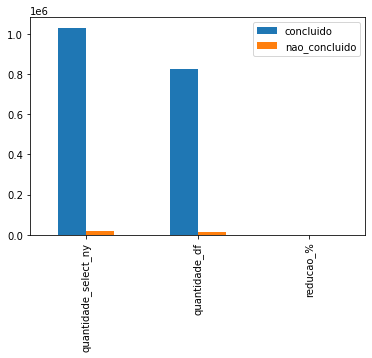

In [132]:
del_df.plot.bar()

In [125]:
del(del_df)

## Criar um grafico de barras comparando quantidade_select_ny x quantidade_df

In [96]:
del_df = delitos.drop(columns = ['conclusao','reducao_%'])

In [99]:
del(delitos)

# Gerando algumas vizualizações de select_ny 

# Delitos concluidos x delitos não concluidos

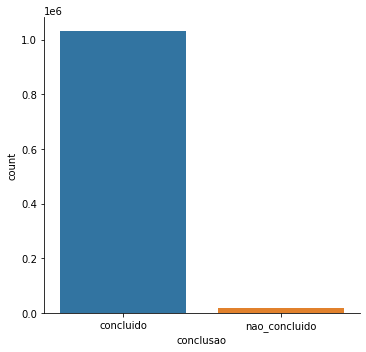

In [28]:
sns.catplot(x="conclusao", kind="count", data = select_ny)
# obtendo os numeros de crimes concluidos e nao concluidos 

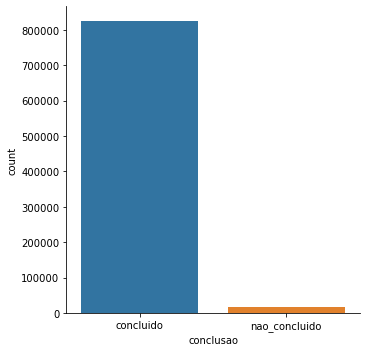

In [29]:
sns.catplot(x="conclusao", kind="count", data = df)
# obtendo os numeros de crimes concluidos e nao concluidos 

## criando um grafico de barras comparando os delitos concluidos x nao concluidos

In [30]:
# df.groupby(df['data']).dt.year['vendas'].sum()

# gerando grafico
# df.groupby(df['data'].dt.year)['vendas'].sum().plot.bar()

# Quantidade de delitos cometidos por bairros
delitos_concluidos_por_bairros -- dataframe

In [87]:
delitos_concluidos_por_bairros = select_ny.query('conclusao == "concluido"')
# delitos_concluidos_por_bairros -- dataFrame a serr utilizados pra demais insights
delitos_concluidos_por_bairros_df = delitos_concluidos_por_bairros.bairro.value_counts()
delitos_concluidos_por_bairros_df = delitos_concluidos_por_bairros_df.to_frame().reset_index()
delitos_concluidos_por_bairros_df.columns = ['bairro' , 'delitos_concluidos']
delitos_concluidos_por_bairros_df

,bairro,delitos_concluidos
0,BROOKLYN,309645
1,MANHATTAN,240259
2,BRONX,223833
3,QUEENS,208015
4,STATEN ISLAND,48064


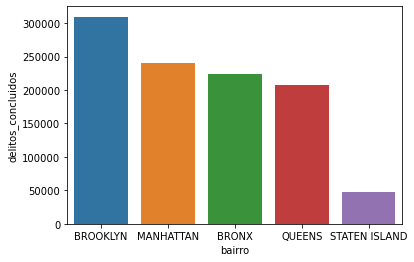

In [88]:
sns.barplot(x = 'bairro' , y = 'delitos_concluidos' , data = delitos_concluidos_por_bairros_df)

# Visualizando o comportamento dos delitos ao longo dos anos 

## Delitos 2013/2014/ 2015 

In [90]:
select_ny

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,NaT,2015-12-31,2020-11-01 23:45:00,NaT,NaT,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB
1,2015-12-31,NaT,2015-12-31,2020-11-01 23:36:00,NaT,NaT,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN
2,2015-12-31,NaT,2015-12-31,2020-11-01 23:30:00,NaT,NaT,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER
3,2015-12-31,NaT,2015-12-31,2020-11-01 23:30:00,NaT,NaT,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE
4,2015-12-31,2015-12-31,2015-12-31,2020-11-01 23:25:00,2020-11-01 23:30:00,00:05:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2013-11-01,2013-11-01,2013-11-01,2020-11-01 20:30:00,2020-11-01 21:00:00,00:30:00,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,RESIDENCE - APT. HOUSE
1048571,2013-11-01,2013-11-01,2013-11-01,2020-11-01 20:28:00,2020-11-01 20:31:00,00:03:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,BROOKLYN,em_frente,GROCERY/BODEGA
1048572,2013-11-01,NaT,2013-11-01,2020-11-01 20:25:00,NaT,NaT,CRIMINAL MISCHIEF & RELATED OF,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,dentro,FAST FOOD
1048573,2013-11-01,2013-11-01,2013-11-01,2020-11-01 20:25:00,2020-11-01 20:45:00,00:20:00,DANGEROUS DRUGS,concluido,contravencao,N.Y. POLICE DEPT,BRONX,em_frente,STREET


In [ ]:
# 
# df.groupby(df['data']).dt.year['vendas'].sum()

# gerando grafico
# df.groupby(df['data'].dt.year)['vendas'].sum().plot.bar()

In [65]:
select_ny.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,NaT,2015-12-31,2020-11-01 23:45:00,NaT,NaT,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB
1,2015-12-31,NaT,2015-12-31,2020-11-01 23:36:00,NaT,NaT,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN
2,2015-12-31,NaT,2015-12-31,2020-11-01 23:30:00,NaT,NaT,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER
3,2015-12-31,NaT,2015-12-31,2020-11-01 23:30:00,NaT,NaT,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE
4,2015-12-31,2015-12-31,2015-12-31,2020-11-01 23:25:00,2020-11-01 23:30:00,00:05:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER


In [ ]:
select_ny.head()

In [ ]:
select_ny.conclusao.value_counts()

In [ ]:
crimes_2009_2015 = delitos_concluidos_por_bairros[['data_da_ocorrencia' , 'nivel_de_ofensa']]
crimes_2009_2015

In [ ]:
crimes_2009_2015.nivel_de_ofensa.value_counts()

In [ ]:
crimes_2009 = crimes_2009_2015.query('data_da_ocorrencia >= "1/1/2009" & data_da_ocorrencia < "1/1/2010"') 

In [ ]:
crimes_2009

## Descrição da ofensa - Tipos de delitos mais comuns

In [ ]:
delitos_concluidos_por_bairros

In [ ]:
tipos_de_delitos = delitos_concluidos_por_bairros.descricao_da_ofensa.value_counts().to_frame().reset_index()
tipos_de_delitos.columns = ['descricao_da_ofensa' , 'quantidade']

In [ ]:
principais_delitos = tipos_de_delitos.head(19)
principais_delitos

## Nivel  de ofensa  dos delitos mais comuns
relacionar os tipos de delitos mais comuns com o nivel de ofensa 

In [ ]:
# separar crime e a descrição dos crimes 
# separar contravenção e ver a descrição da contravencção
# separar violação e ver a descrição da violação

## Detalhando os crimes 

In [ ]:
crimes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "crime"').descricao_da_ofensa.value_counts()
crimes_df = crimes_df.to_frame().reset_index()
crimes_df.columns = ['tipo_crimes','quantidade']
crimes_df

## Detalhando as contravenções 

In [ ]:
contravencoes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "contravencao"').descricao_da_ofensa.value_counts()
contravencoes_df = contravencoes_df.to_frame().reset_index()
contravencoes_df.columns = ['tipo_contravencao','quantidade']
contravencoes_df

## Detalhando as violações

In [ ]:
violacoes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "violacao"').descricao_da_ofensa.value_counts()
violacoes_df = violacoes_df.to_frame().reset_index()
violacoes_df.columns = ['tipo_violacao','quantidade']
violacoes_df

# Relação entre o  horario e os tipos de delitos 

## Qual departamento e responsável pelos delitos

In [ ]:
dep_resp_delitos = delitos_concluidos_por_bairros[['jurisdicao','descricao_da_ofensa','nivel_de_ofensa','local_da_ocorrencia']]
dep_resp_delitos

jurisdição

In [ ]:
jurisdicao_crimes = dep_resp_delitos.query('nivel_de_ofensa == "crime"')
jurisdicao_crimes.jurisdicao.value_counts()


In [ ]:
jurisdicao_contravencao = dep_resp_delitos.query('nivel_de_ofensa == "contravencao"')
jurisdicao_contravencao.jurisdicao.value_counts()


In [ ]:
jurisdicao_violacao = dep_resp_delitos.query('nivel_de_ofensa == "violacao" ')
jurisdicao_violacao.jurisdicao.value_counts()


## Local da ocorrencia 
#### Neste tópico , podemos separar o local onde ocorreu o delito , se dentro ou fora do estabelecimento em questão 

In [ ]:
# total de delitos concluidos 
total_registros = len(delitos_concluidos_por_bairros.local_da_ocorrencia)
total_registros

In [ ]:
# delitos que aconteceram na parte de dentro dos estabelecimentos
total_delitos_local_da_ocorrencia = delitos_concluidos_por_bairros.query('local_da_ocorrencia == "dentro" ')
total_delitos_dentro = sum(total_delitos_local_da_ocorrencia.local_da_ocorrencia.value_counts())
total_delitos_dentro

In [ ]:
#  delitos que aconteceram na parte de fora dos estabelecimentos
total_delitos_fora_do_local_da_ocorrencia = delitos_concluidos_por_bairros.query('local_da_ocorrencia != "dentro" ')
total_delitos_fora_do_local =  sum(total_delitos_fora_do_local_da_ocorrencia.local_da_ocorrencia.value_counts())
total_delitos_fora_do_local

In [ ]:
#  delitos que não tiveram registro se dentro ou fora do local da ocorrencia
delitos_sem_registro_do_local = total_registros - (total_delitos_dentro + total_delitos_fora_do_local)
delitos_sem_registro_do_local

In [ ]:
# crinado um DataFrame para visualizar os dados obtidos acima a respeito do local dos delitos


dados_local_da_ocorrencia = {
    'local' : ['dentro','fora', 'sem_registro'],
    'total' : [total_delitos_dentro, total_delitos_fora_do_local, delitos_sem_registro_do_local ]

}

dados_local_da_ocorrencia_df = pd.DataFrame(dados_local_da_ocorrencia)

In [ ]:
dados_local_da_ocorrencia_df

### Visualisando local onde acontecem os delitos 

In [ ]:
sns.barplot(x = 'local' , y = 'total' , data = dados_local_da_ocorrencia_df)

In [ ]:
dados_local_da_ocorrencia_df

## Verificando e visualizando quais os tipos de ofensa e suas ocorrencias

In [ ]:
# duração media do tipo nivel_de_ofensa x  descrição_da_ofensa 

In [ ]:
nivel_de_ofensa = select_ny.query('conclusao == "concluido" ')
nivel_de_ofensa_df = nivel_de_ofensa.nivel_de_ofensa.value_counts()
nivel_de_ofensa_df = nivel_de_ofensa_df.to_frame().reset_index()
nivel_de_ofensa_df.columns = ['ofensa' , 'quantidade']
nivel_de_ofensa_df
# visualizando os tipos de crimes e suas quantidades

In [ ]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = nivel_de_ofensa_df)

### Duração media de cada tipo de ofensa

In [ ]:
nivel_de_ofensa

In [ ]:
duracao_crimes = nivel_de_ofensa.query('nivel_de_ofensa == "crime"')
duracao_crimes = duracao_crimes.duracao_da_ocorrencia.mean()
duracao_crimes

In [ ]:
duracao_contravencao = nivel_de_ofensa.query('nivel_de_ofensa == "contravencao"')
duracao_contravencao =  duracao_contravencao.duracao_da_ocorrencia.mean()
duracao_contravencao

In [ ]:
duracao_violacao = nivel_de_ofensa.query('nivel_de_ofensa == "violacao"')
duracao_violacao =  duracao_violacao.duracao_da_ocorrencia.mean()
duracao_violacao

### Distribuição dos tipos de ofensa por  bairros

#### BROOKLYN

In [ ]:
brooklyn = nivel_de_ofensa.query('bairro == "BROOKLYN" ')
brooklyn_df = brooklyn.nivel_de_ofensa.value_counts().to_frame().reset_index()
brooklyn_df.columns = ['ofensa' , 'quantidade']
brooklyn_df

In [ ]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = brooklyn_df)

#### MANHATTAN

In [ ]:
manhattan = nivel_de_ofensa.query('bairro == "MANHATTAN" ')
manhattan_df = manhattan.nivel_de_ofensa.value_counts().to_frame().reset_index()
manhattan_df.columns = ['ofensa' , 'quantidade']
manhattan_df

In [ ]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = manhattan_df)

#### BRONX

In [ ]:
bronx = nivel_de_ofensa.query('bairro == "BRONX" ')
bronx_df = bronx.nivel_de_ofensa.value_counts().to_frame().reset_index()
bronx_df.columns = ['ofensa' , 'quantidade']
bronx_df

In [ ]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = bronx_df)

#### QUEENS

In [ ]:
queens = nivel_de_ofensa.query('bairro == "QUEENS"')
queens_df = queens.nivel_de_ofensa.value_counts().to_frame().reset_index()
queens_df.columns = ['ofensa' , 'quantidade']
queens_df

In [ ]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = queens_df)

#### STATEN ISLAND

In [ ]:
staten_island = nivel_de_ofensa.query('bairro == "STATEN ISLAND"')
staten_island_df = staten_island.nivel_de_ofensa.value_counts().to_frame().reset_index()
staten_island_df.columns = ['ofensa' , 'quantidade']
staten_island_df

In [ ]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = staten_island_df)

## Comparando as ocorrencias de contravenção em cada bairro

In [ ]:
# gerando as variaveis contravenção de cada bairro

# BROOKLYN
contravencao_brooklyn = sum(brooklyn_df.query('ofensa == "contravencao"').quantidade)
contravencao_brooklyn

# MANHATTAN
contravencao_manhattan = sum(manhattan_df.query('ofensa == "contravencao"').quantidade)
contravencao_manhattan

# BRONX
contravencao_bronx = sum(bronx_df.query('ofensa == "contravencao"').quantidade)
contravencao_bronx

# queens
contravencao_queens = sum(queens_df.query('ofensa == "contravencao"').quantidade)
contravencao_queens


# staten_island
contravencao_staten_island = sum(staten_island_df.query('ofensa == "contravencao"').quantidade)
contravencao_staten_island


In [ ]:

contravencao_por_bairros = {
    'bairro' : ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten_island'],
    'total_contravencao' : [contravencao_brooklyn, contravencao_manhattan, contravencao_bronx, contravencao_queens, contravencao_staten_island ]

}

contravencao_por_bairros_df = pd.DataFrame(contravencao_por_bairros)

In [ ]:
contravencao_por_bairros_df

In [ ]:
sns.barplot(x = 'bairro' , y = 'total_contravencao' , data = contravencao_por_bairros_df)

In [ ]:
contravencao_por_bairros_df.plot(x = 'bairro' , y = 'total_contravencao' , color = 'red' )

## Comparando as ocorrencias de crimes em cada bairro

In [ ]:
# comparar delitos (crime x contravenção x violaçao ) entre os  bairros 
# criar variaveis e por meio de um dicionario criar um dataFrame e visualizar as comparaçoes

In [ ]:
# gerando as variaveis crimes de cada bairro

# BROOKLYN
crimes_brooklyn = sum(brooklyn_df.query('ofensa == "crime"').quantidade)
crimes_brooklyn

# MANHATTAN
crimes_manhattan = sum(manhattan_df.query('ofensa == "crime"').quantidade)
crimes_manhattan

# BRONX
crimes_bronx = sum(bronx_df.query('ofensa == "crime"').quantidade)
crimes_bronx

# queens
crimes_queens = sum(queens_df.query('ofensa == "crime"').quantidade)
crimes_queens


# staten_island
crimes_staten_island = sum(staten_island_df.query('ofensa == "crime"').quantidade)
crimes_staten_island


In [ ]:

crimes_por_bairros = {
    'bairro' : ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten_island'],
    'total_crimes' : [crimes_brooklyn, crimes_manhattan, crimes_bronx, crimes_queens, crimes_staten_island ]

}

crimes_por_bairros_df = pd.DataFrame(crimes_por_bairros)

In [ ]:
crimes_por_bairros_df

In [ ]:
sns.barplot(x = 'bairro' , y = 'total_crimes' , data = crimes_por_bairros_df)

In [ ]:
crimes_por_bairros_df.plot(x = 'bairro' , y = 'total_crimes' , color = 'blue' )

## Comparando as ocorrencias de violação em cada bairro

In [ ]:
# gerando as variaveis violação de cada bairro

# BROOKLYN
violacao_brooklyn = sum(brooklyn_df.query('ofensa == "violacao"').quantidade)
violacao_brooklyn

# MANHATTAN
violacao_manhattan = sum(manhattan_df.query('ofensa == "violacao"').quantidade)
violacao_manhattan

# BRONX
violacao_bronx = sum(bronx_df.query('ofensa == "violacao"').quantidade)
violacao_bronx

# queens
violacao_queens = sum(queens_df.query('ofensa == "violacao"').quantidade)
violacao_queens


# staten_island
violacao_staten_island = sum(staten_island_df.query('ofensa == "violacao"').quantidade)
violacao_staten_island

In [ ]:

violacao_por_bairros = {
    'bairro' : ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten_island'],
    'total_violacao' : [violacao_brooklyn, violacao_manhattan, violacao_bronx, violacao_queens, violacao_staten_island ]

}

violacao_por_bairros_df = pd.DataFrame(violacao_por_bairros)

In [ ]:
violacao_por_bairros_df

In [ ]:
sns.barplot(x = 'bairro' , y = 'total_violacao' , data = violacao_por_bairros_df)

# Crimes não concluidos por bairro

In [ ]:
crimes_nao_concluidos_por_bairros = select_ny.query('conclusao == "nao_concluido" ').bairro.value_counts()
crimes_nao_concluidos_por_bairros_df = pd.DataFrame(crimes_nao_concluidos_por_bairros).reset_index()
crimes_nao_concluidos_por_bairros_df.columns = ['bairro' , 'crimes_nao_concluidos']
sns.barplot(x = 'bairro' , y = 'crimes_nao_concluidos' , data = crimes_nao_concluidos_por_bairros_df)

In [ ]:
crimes_nao_concluidos_por_bairros_df

## Detalhando 

In [ ]:
crimes_falhos_df = select_ny.query('conclusao == "nao_concluido" ')
crimes_falhos_df
# crimes_falhos_df.dropna(subset = ['data_final_da_ocorrencia' ,'hora_termino_da_ocorrencia'])
# não podem ser excluidos pois muitos registros seriam peridos 

In [ ]:
descricao_crimes_falhos = crimes_falhos_df.descricao_da_ofensa.value_counts().to_frame().reset_index()
descricao_crimes_falhos.columns = [' descricao_da_ofensa' , 'quantidade']
descricao_crimes_falhos.head(20)
# quais os tipos e a quantidade dos crimes que não foram concluidos  